In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

# Import Data

In [51]:
df = pd.read_csv('Data_Midterm.csv')
print(df.shape)
df.head()

(108540, 11)


,Unnamed: 0,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    108540 non-null  int64  
 1   Brand         108540 non-null  object 
 2   model         108540 non-null  object 
 3   year          108540 non-null  int64  
 4   price         108540 non-null  int64  
 5   transmission  108540 non-null  object 
 6   mileage       108540 non-null  int64  
 7   fuelType      108540 non-null  object 
 8   tax           99187 non-null   float64
 9   mpg           99187 non-null   float64
 10  engineSize    108540 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 9.1+ MB


# Data Preprocessing

Duplicated Data

In [53]:
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df.shape

(108540, 11)

In [54]:
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.dropna()


Missing Values

In [55]:
df.isnull().sum()

Brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [56]:
X = df[['price', 'mileage']]
X.head()

,price,mileage
0,12500,15735
1,16500,36203
2,11000,29946
3,16800,25952
4,17300,1998


# K-Means

In [57]:
# Vẽ biểu đồ
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    X4 = X[label == 4, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'g^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'ys', markersize = 4, alpha = .8)
    plt.plot(X3[:, 0], X3[:, 1], 'cs', markersize = 4, alpha = .8)
    plt.plot(X4[:, 0], X4[:, 1], 'bv', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

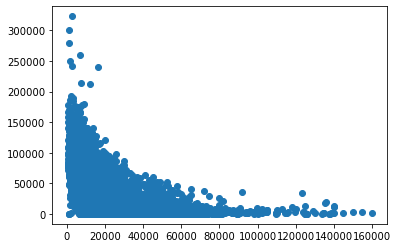

In [77]:
plt.scatter(df['price'], df['mileage'])

In [59]:
from scipy.spatial.distance import cdist 
# khởi tạo các centers ban đầu
def kmeans_init_centers(X, k):
    # chọn ngẫu nhiên k của X làm tâm ban đầu
    return X[np.random.choice(X.shape[0], k, replace=False)]

# gán nhãn mới cho các điểm khi biết các centers
def kmeans_assign_labels(X, centers):
    # tính toán khoảng cách theo cặp giữa dữ liệu và centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

# cập nhập các centers mới trên dữ liệu đã được gán nhãn
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # lấy trung bình
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

# kiểm tra điều kiện dừng của thuật toán
def has_converged(centers, new_centers):
    # trả về True nếu hai centers giống nhau
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [60]:
# 
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [61]:
Sum_of_squared_error = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_error.append(km.inertia_)

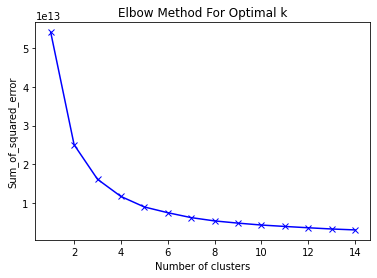

In [62]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_error')
plt.title('Elbow Method For Optimal k')
plt.show()

Centers found by our algorithm:
[[ 9134.13334294 77846.59031282]
 [14023.50493217 13372.46969594]
 [31264.00806248  5316.16240867]
 [12874.28846428 37333.10930828]]


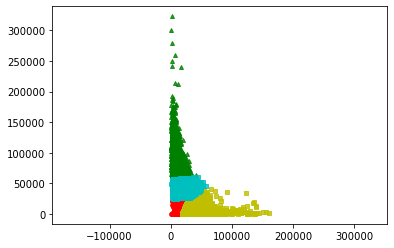

In [71]:
K=4
x = df.iloc[:,[3,5]].values

(centers, labels, it) = kmeans(x, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(x, labels[-1])

Centers found by scikit-learn:
[[13956.73876132 13585.38300707]
 [12846.83179757 37620.83219351]
 [ 9099.08476568 78229.5066843 ]
 [31015.50366833  5306.57757644]]


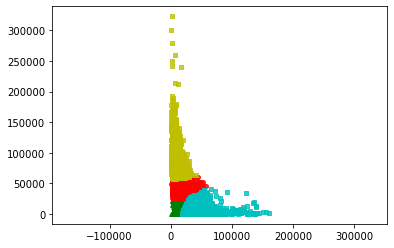

In [75]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(x)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(x)
kmeans_display(x, pred_label)